In [1]:
# Importing Required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing with NLTK & spaCy


## Task 1: Load and Explore the Dataset

**Objective:** Understand the data structure and perform basic Exploratory Data Analysis (EDA).

In this task, we will create a read a given dataset and explore it.

1. Check first 5 rows
2. Analyse Class distribution
3. Analyse Text Length


Dataset Shape: (17289, 2)

First 5 rows:


,sentiment,content
0,negative,Layin n bed with a headache ughhhh...waitin o...
1,negative,Funeral ceremony...gloomy friday...
2,neutral,@dannycastillo We want to trade with someone w...
3,negative,"I should be sleep, but im not! thinking about ..."
4,negative,@charviray Charlene my love. I miss you


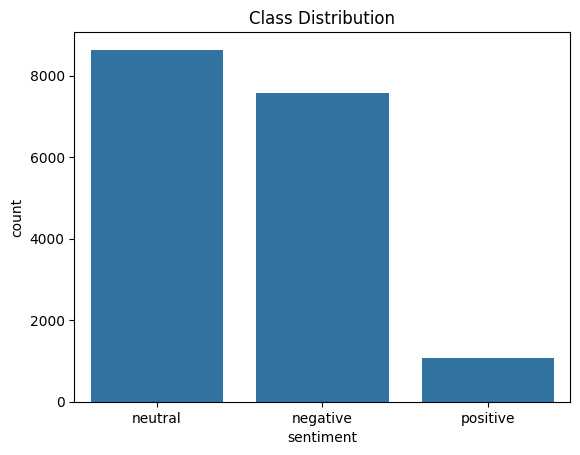

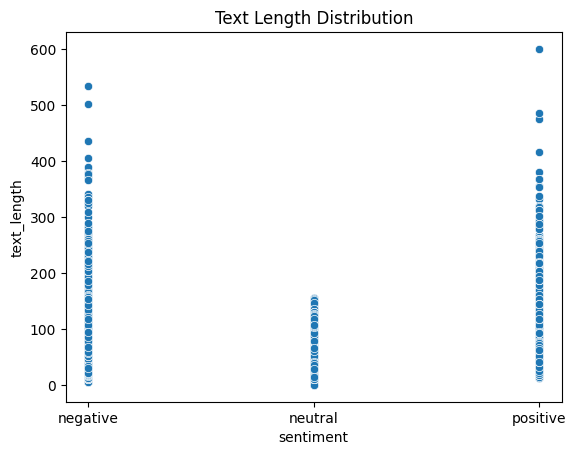

In [9]:
# 1.1 Read dataset
df = pd.read_csv('/content/emo_text.csv')

# 1.2 Basic Exploration
print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

sns.barplot(x=df['sentiment'].value_counts().index, y=df['sentiment'].value_counts())
plt.title("Class Distribution")
plt.show()

df["text_length"] = df["content"].apply(len)
sns.scatterplot(x=df['sentiment'],y=df["text_length"])
plt.title("Text Length Distribution")
plt.show()

## Task 2: Text Pre-processing with NLTK

**Objective:** Learn the "classic" way of cleaning text using the Natural Language Toolkit (NLTK). We will cover Tokenization, Stopword Removal, and Stemming.

Write a python function `preprocess_nltk(text)` that does the following using `NLTK Library`:

1. Normalising the text (Lowercasing)
2. Tokenization (Splitting text into words)
3. Removing Punctuation and Stopwords
4. Stemming (Reducing words to their root form, e.g., "running" -> "run")

and return cleaned text

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Initialize Stemmer and Stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_nltk(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(stemmed_tokens)

df['NLTK_Cleaned'] = df['content'].apply(preprocess_nltk)

print("Original vs NLTK Processed:")
display(df[['content', 'NLTK_Cleaned']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original vs NLTK Processed:


,content,NLTK_Cleaned
0,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhh ... waitin call ...
1,Funeral ceremony...gloomy friday...,funer ceremoni ... gloomi friday ...
2,@dannycastillo We want to trade with someone w...,dannycastillo want trade someon houston ticket...
3,"I should be sleep, but im not! thinking about ...",sleep im think old friend want 's marri damn a...
4,@charviray Charlene my love. I miss you,charviray charlen love miss


## Task 3: Advanced Pre-processing with spaCy

**Objective:** Use spaCy's industrial-strength pipeline for efficient processing, focusing on Lemmatization.

wrtie a python function `preprocess_spacy(text` that does the follwoing thing using `spacy`:

1. Create a spaCy Doc object
2. Lemmatization and stopword removal

and return cleaned text

In [20]:
import spacy

# Load the small English model
nlp = spacy.load("en_core_web_sm")

def preprocess_spacy(text):
    doc = nlp(text)
    cleaned_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct:
            cleaned_tokens.append(token.lemma_)

    return " ".join(cleaned_tokens)
df['Spacy_Cleaned'] = df['content'].apply(preprocess_spacy)

print("NLTK (Stemmed) vs spaCy (Lemmatized):")
display(df[['NLTK_Cleaned', 'Spacy_Cleaned']].head())

NLTK (Stemmed) vs spaCy (Lemmatized):


,NLTK_Cleaned,Spacy_Cleaned
0,layin n bed headach ughhhh ... waitin call ...,Layin n bed headache ughhhh waitin
1,funer ceremoni ... gloomi friday ...,funeral ceremony gloomy friday
2,dannycastillo want trade someon houston ticket...,@dannycastillo want trade Houston ticket
3,sleep im think old friend want 's marri damn a...,sleep m think old friend want marry damn amp w...
4,charviray charlen love miss,@charviray charlene love miss


## Task 4: Feature Engineering (Bag of Words & TF-IDF)

**Objective:** Machines cannot understand text. We must convert text into numbers (vectors).

### 4.1 Count Vectorizer (Bag of Words)
This method counts how many times each word appears in a document.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize
count_vect = CountVectorizer()

# Fit and Transform the spaCy cleaned text
X_counts = count_vect.fit_transform(df['Spacy_Cleaned'])

# Convert to array to visualize
count_array = X_counts.toarray()
df_counts = pd.DataFrame(data=count_array, columns=count_vect.get_feature_names_out())

print("Count Vector Representation (Bag of Words):")
display(df_counts.head())

Count Vector Representation (Bag of Words):


,00,000,00am,02,023,0255,02mxjj,03,04,05,...,½u,½ulein,½ureo,½ve,½who,½why,½whyyy,½y,½z,½ï
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2 TF-IDF (Term Frequency - Inverse Document Frequency)
This method highlights words that are important to a specific document but rare across the corpus (filtering out common words like "the", "is", etc., even if stopwords didn't catch them).

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize
tfidf_vect = TfidfVectorizer()

# Fit and Transform
X_tfidf = tfidf_vect.fit_transform(df['Spacy_Cleaned'])

# Convert to array to visualize
tfidf_array = X_tfidf.toarray()
df_tfidf = pd.DataFrame(data=tfidf_array, columns=tfidf_vect.get_feature_names_out())

print("TF-IDF Vector Representation:")
display(df_tfidf.head())

TF-IDF Vector Representation:


,00,000,00am,02,023,0255,02mxjj,03,04,05,...,½u,½ulein,½ureo,½ve,½who,½why,½whyyy,½y,½z,½ï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Task 5: Sentiment Analysis Model

**Objective:** Build a Machine Learning classifier to predict sentiment based on our text features.

Write a python code that builds `MultinomiaNB` model that is trained on TF-IDF values and sentiment.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Split Data
X = X_tfidf
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# 2. Train Model (Naive Bayes is excellent for text)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# 3. Predict
y_pred = nb_classifier.predict(X_test)

# 4. Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.70      0.66      1496
     neutral       0.78      0.56      0.65      1753
    positive       0.38      0.95      0.55       209

    accuracy                           0.64      3458
   macro avg       0.59      0.74      0.62      3458
weighted avg       0.69      0.64      0.65      3458

Confusion Matrix:
[[1044  282  170]
 [ 620  985  148]
 [   9    2  198]]


## Task 6: Interactive Prediction

**Objective:** Test the model with new, unseen user input.


Write python function `predict_sentiment(text)` that predict the sentiment of the given text by performing the following:
1. Preprocess using our defined spaCy function
2. Vectorize using the fitted TF-IDF object
3. Prediction

and returns the predicted sentiment.

In [36]:
def predict_sentiment(text):
    text = preprocess_spacy(text)
    text_vectorized = tfidf_vect.transform([text])
    sentiment = nb_classifier.predict(text_vectorized)[0]

    return sentiment

# Test with your own strings
new_review = "The product was okay but the delivery was very slow."
print(f"Review: '{new_review}'")
print(f"Predicted Sentiment: {predict_sentiment(new_review)}")

new_review_2 = "I absolutely loved it! Best day ever."
print(f"Review: '{new_review_2}'")
print(f"Predicted Sentiment: {predict_sentiment(new_review_2)}")

Review: 'The product was okay but the delivery was very slow.'
Predicted Sentiment: neutral
Review: 'I absolutely loved it! Best day ever.'
Predicted Sentiment: positive
